In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score


In [2]:
DATA_PATH = "./data/"
RED = DATA_PATH + "just_red/"

In [3]:
measured_sn = pd.read_pickle(RED + 'msn_just_red.pickle')

print(measured_sn.shape)

allnsn_small = pd.read_pickle(RED+"nsn_just_red.pickle").sample(len(measured_sn))

print(allnsn_small.shape)

(125, 32)
(125, 32)


In [4]:
all_df = pd.concat([measured_sn,allnsn_small])

In [5]:
all_df["fact_Class"] = pd.factorize(all_df['Class'])[0]

In [6]:
all_df = all_df.sample(frac=1)
all_df.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,fact_Class
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
MSN_82640,0,r,sn,15,6.793105,0.200000,0.089001,0.153277,0.417704,0.782028,0.923149,-0.101952,...,-0.019797,0.000019,3.795786e-07,5.236532e-10,1.059911,-3.769231,4.385605,33.661816,0.840147,0
MSN_103582,0,r,sn,45,113.011627,0.266667,0.113509,0.151772,0.235577,0.411279,0.680246,0.962919,...,0.125128,0.001704,-2.195103e-06,-2.708026e-08,-0.399694,-3.215947,46.079145,-19.705754,0.645480,0
MSN_28308,0,r,sn,16,34.498713,0.250000,0.118310,0.533734,0.689782,0.858315,0.911907,-1.175184,...,-0.824876,0.026484,-1.129981e-04,-2.250124e-06,0.763872,-3.708791,25.152131,403.208688,0.906838,0
350776,0,r,non-sn,7,2.736425,0.428571,0.444230,0.748398,0.820522,0.892646,0.957426,-2.453374,...,0.082007,0.001232,-2.175963e-06,-1.838026e-08,-0.171950,-5.400000,2.405581,-1.048847,0.950432,1
5938,0,r,non-sn,7,1.259203,0.428571,0.194737,0.350049,0.579439,0.808828,0.928993,-1.336608,...,-0.001271,-0.000006,1.420230e-08,7.447832e-11,0.245531,-5.400000,0.965889,-0.663814,0.898495,1


In [7]:
all_train, all_test= train_test_split(all_df,test_size = 0.25)

In [8]:
# all_train = pd.concat([sn_train,nsn_train])
# all_test = pd.concat([sn_test,nsn_test])

print(all_train.shape)
print(all_test.shape)

(187, 33)
(63, 33)


In [9]:
all_train.isna().sum()

Class                                 0
ObsCount                              0
amplitude                             0
beyond1st                             0
flux_percentile_ratio_mid20           0
flux_percentile_ratio_mid35           0
flux_percentile_ratio_mid50           0
flux_percentile_ratio_mid65           0
flux_percentile_ratio_mid80           0
kurtosis                              0
max_slope                             0
median_absolute_deviation             0
median_buffer_range_percentage        0
pair_slope_trend                      0
pair_slope_trend_last_30              0
percent_amplitude                     0
percent_difference_flux_percentile    0
poly1_t1                              4
poly2_t1                              4
poly2_t2                              4
poly3_t1                              4
poly3_t2                              4
poly3_t3                              4
poly4_t1                              4
poly4_t2                              4


In [10]:
all_test.isna().sum()

Class                                 0
ObsCount                              0
amplitude                             0
beyond1st                             0
flux_percentile_ratio_mid20           0
flux_percentile_ratio_mid35           0
flux_percentile_ratio_mid50           0
flux_percentile_ratio_mid65           0
flux_percentile_ratio_mid80           0
kurtosis                              0
max_slope                             0
median_absolute_deviation             0
median_buffer_range_percentage        0
pair_slope_trend                      0
pair_slope_trend_last_30              0
percent_amplitude                     0
percent_difference_flux_percentile    0
poly1_t1                              1
poly2_t1                              1
poly2_t2                              1
poly3_t1                              1
poly3_t2                              1
poly3_t3                              1
poly4_t1                              1
poly4_t2                              1


In [11]:
all_test = all_test.fillna(0)
all_train = all_train.fillna(0)
all_test = all_test.sample(frac=1)
all_train = all_train.sample(frac=1)

In [12]:
all_test.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,fact_Class
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
111469,0,r,non-sn,14,1.440352,0.285714,0.130846,0.222903,0.288348,0.509203,0.733474,1.924499,...,-0.000004,0.000012,3.130905e-09,-8.860617e-11,-1.000864,-3.840909,0.738731,0.241618,0.779718,1
MSN_10983,0,r,sn,6,28.656433,0.333333,0.251907,0.461969,0.672031,0.843394,0.937358,-1.630387,...,0.796572,0.003898,-3.759500e-05,3.500029e-08,-0.528569,-6.250000,23.638946,-109.700131,0.870317,0
51853,0,r,non-sn,15,1.621154,0.266667,0.049569,0.068654,0.177609,0.290997,0.608659,3.279126,...,-0.004331,-0.000021,5.136498e-08,6.332886e-11,1.284407,-3.769231,0.744551,0.207747,0.700301,1
384880,0,r,non-sn,5,0.956646,0.400000,0.328572,0.575001,0.821430,0.888394,0.955358,-3.046039,...,-0.021625,-0.000371,4.169824e-07,5.242469e-09,0.458873,-8.000000,0.902995,-0.384895,0.981344,1
MSN_120903,0,r,sn,8,18.130955,0.500000,0.022429,0.059668,0.281575,0.706619,0.940113,-0.340326,...,-1.056313,-0.055035,2.218307e-03,-4.660164e-06,0.649824,-4.900000,12.875054,27.361056,0.763083,0


In [13]:
all_train.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,fact_Class
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
MSN_20720,0,r,sn,5,9.111393,0.200000,0.061718,0.108007,0.154296,0.471435,0.788574,4.549484,...,-0.138474,0.011957,-1.070521e-03,-1.311249e-04,-2.111304,-8.000000,7.618235,43.989549,0.774143,0
MSN_69741,0,r,sn,19,81.476200,0.105263,0.087972,0.145500,0.284562,0.537024,0.713753,9.488858,...,-0.584238,0.005108,-2.155287e-05,-8.261438e-08,2.773092,-3.573529,34.401078,182.343270,0.607717,0
MSN_56430,0,r,sn,12,8.886982,0.333333,0.310512,0.480958,0.655719,0.706290,0.826092,-1.260075,...,-0.362242,-0.029254,7.280945e-04,2.614191e-07,0.146336,-4.033333,5.736622,48.364768,0.838519,0
180980,0,r,non-sn,6,1.466762,0.333333,0.322920,0.450345,0.577771,0.718934,0.887574,-1.235185,...,-0.003950,0.000068,7.247937e-08,-4.956691e-10,0.385367,-6.250000,1.120927,-0.134403,0.902787,1
345107,0,r,non-sn,16,2.861583,0.312500,0.114111,0.156717,0.265168,0.574692,0.791165,0.062740,...,0.001526,0.000045,-1.035774e-08,-1.901197e-10,0.152064,-3.708791,1.505792,-0.695726,0.747747,1


In [14]:
features = all_train.columns[1:-1]
print(features)
y_train = np.array(all_train['fact_Class'])

Index(['ObsCount', 'amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [15]:
y_train


array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [16]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')

In [17]:
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [18]:
# y_test = pd.factorize(all_test["Class"])[0]
y_test = np.array(all_test['fact_Class'])

In [19]:
clf.score(all_test[features],y_test)

1.0

In [20]:
preds1 = clf.predict_proba(all_test[features])

In [21]:
preds = clf.predict(all_test[features])

In [22]:
mc = pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

In [23]:
mc

Actual,0,1
Predicted,,
0,29,0
1,0,34


In [24]:
print(mc.head())
print("-------------------------")
print("Sensitivity: {:.4f}".format(mc[0][0]/sum(mc[0])))
print("Specificity: {:.4f}".format(mc[1][1]/sum(mc[1])))

Actual       0   1
Predicted         
0           29   0
1            0  34
-------------------------
Sensitivity: 1.0000
Specificity: 1.0000


Text(0,0.5,'precision')

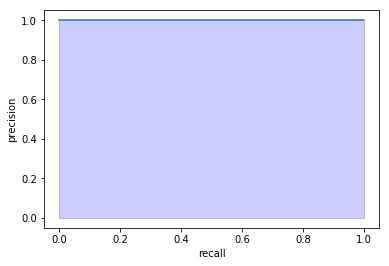

In [25]:
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')